# Python and pandas for deep learning
> Using Python and pandas for working with your files

In this notebook, we examine how one can work with files, particularly with pandas to get the data in a desired format for usage with deep learning packages.  Here, we'll examine how to use Google Colab with Google Drive mounted so that you'll be able to access your data files.  Note that there are many ways to achieve this; one method is described below!

# Mounting with Google Colab

The instructions for mounting Google Drive are concisely described in the 0 notebook.  For more options about uploading and interacting with Google Colab, see their IO notebook here: https://colab.research.google.com/notebooks/io.ipynb .

Here, the approach we will take is as follows.  First, we'll mount Google Drive via https://colab.research.google.com .  So we'll all have access to the same files, we'll go ahead and clone this repository in Google Drive.  This will give us access to the repository and file contents programmatically.  Note that when you first mount, you may have to enter some credentials and provide some approvals.  The steps are outlined here.

## 1.  Mount Google Drive
Note that you can also use the mount button in the sidebar.  Follow all steps to provide approval and access.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2.  Clone the repo
Again, we're cloning the repo mostly just so we'll have the desired files that we want and you can see how to do it using Google Drive.  Here, we'll simulate this by cloning within your Google Drive.  You can see this with the `cd` (Change Directory) command below.

Again, keep in mind that if your data already exists somewhere on your drive, you wouldn't necessarily have to do this unless you wanted to access the repo on your drive.  You would use the filepaths directly as shown in a following step.

In [ ]:
%cd drive/MyDrive
!git clone https://github.com/vanderbilt-data-science/deep-learning-intensive.git
%cd deep-learning-intensive

## 3. Install and load the required modules
We need to pip install transformers.  We'll do this below.  The rest are already available through Google Colab.

In [ ]:
!pip install transformers

In [ ]:
#import data science packages
import pandas as pd
import numpy as np
import seaborn as sns

#import file helper packages
import glob

#dl imports
from transformers import pipeline

# Example scenario
You're working with the text of number of magazine articles, written by a number of authors, whose names are not included in the text.  The magazine articles have unique IDs, which are given by their filenames.  

You also have an accompanying CSV file with details about all of the authors, including their name, age, years of employment as a journalist, college major, and IDs corresponding to the articles that they've written.  

You're interested in learning whether their college major affects the sentiments of their articles.  The only data that you have access to is gathered on a particular day over a set of journalists and articles.  You've decided that the first crack you'll take about understanding this relationship is to separate the journalists (or articles) into groups according to their college major, and count the sentiments for all the corresponding articles for each group.

## Access data
The first thing you'll need to do is access your data and be able to load it for processing with Python.  We'll use `glob` for this.  Note that we've changed into the repo directory, meaning that the filepath to `workshop-files` is `workshop-files` with no other additional paths necessary.

In [ ]:
filenames = glob.glob('workshop-files/*.txt')
filenames

['workshop-files\\209035.txt',
 'workshop-files\\2341231.txt',
 'workshop-files\\244666.txt',
 'workshop-files\\272307.txt',
 'workshop-files\\297116.txt',
 'workshop-files\\332305.txt',
 'workshop-files\\343212.txt',
 'workshop-files\\373587.txt',
 'workshop-files\\434648.txt',
 'workshop-files\\454321.txt',
 'workshop-files\\479957.txt',
 'workshop-files\\520668.txt',
 'workshop-files\\532970.txt',
 'workshop-files\\541893.txt',
 'workshop-files\\542169.txt',
 'workshop-files\\551293.txt',
 'workshop-files\\597061.txt',
 'workshop-files\\671125.txt',
 'workshop-files\\696866.txt',
 'workshop-files\\830014.txt',
 'workshop-files\\836261.txt',
 'workshop-files\\893941.txt',
 'workshop-files\\930880.txt']

### Get file contents
We're going to be using the requests package to read from a remote file (the repo on GitHub).  You can use the `requests.get(insert-url-path-here.txt)` function to get the contents of a remote url.  Let's use a list comprehension to implement this functionality.  We'll do this together!

In [ ]:
#read file contents
file_contents = []
for file in filenames:
    with open(file, 'r') as f:
        file_contents.append(f.read())

In [ ]:
print('Length of file contents list:', len(file_contents))
file_contents[0][:100]

Length of file contents list: 23


"It was a concerning development that he couldn't get out of his mind. He'd had many friends througho"

### Read tabular data
Here, we'll read the tabular data stored in the csv about the authors.

In [ ]:
#concatenate file path
author_df = pd.read_csv('workshop-files/author_data.csv')
author_df.head()

,last_name,first_name,age,years_of_journalism,college major,article_id
0,west,enrique,56,12,humanities,551293
1,braun,damien,43,13,humanities,373587
2,osborn,ellie,22,2,engineering,597061
3,vega,cierra,67,34,science,434648
4,cantrell,alden,53,23,science,532970


### Creating dataframes from lists/dictionaries
Now, we'll make a dataframe of the files and concatenate them to the df_list.

In [ ]:
#first, create a dataframe from your filename list and your text
tinfo_df = pd.DataFrame({'filename':[fname.split('\\')[-1] for fname in filenames], 'text':file_contents})
tinfo_df['article_id'] = tinfo_df['filename'].apply(lambda x: int(x.split('.')[0]))
tinfo_df.head()

,filename,text,article_id
0,209035.txt,It was a concerning development that he couldn...,209035
1,2341231.txt,Bread is one of the oldest prepared foods. Evi...,2341231
2,244666.txt,"""Explain to me again why I shouldnt cheat?"" he...",244666
3,272307.txt,Do you think you're living an ordinary life? Y...,272307
4,297116.txt,What have you noticed today? I noticed that if...,297116


### Putting data together: joining data
Now, we can join the data together.  There are many different types of joins, but essentially a join will look for one or more key, match the key, and then bind the columns of both dataframes together where the key matches.  We'll do a simple inner join here.

In [ ]:
print("Text info columns:", tinfo_df.columns.tolist())
print("Author columns:", author_df.columns.tolist())

Text info columns: ['filename', 'text', 'article_id']
Author columns: ['last_name', 'first_name', 'age', 'years_of_journalism', 'college major', 'article_id']


In [ ]:
#join tables
full_df = pd.merge(author_df, tinfo_df, on='article_id')

#print some info
display(full_df.head())
print(full_df.shape)

,last_name,first_name,age,years_of_journalism,college major,article_id,filename,text
0,west,enrique,56,12,humanities,551293,551293.txt,"The rain and wind abruptly stopped, but the sk..."
1,braun,damien,43,13,humanities,373587,373587.txt,She patiently waited for his number to be call...
2,osborn,ellie,22,2,engineering,597061,597061.txt,The chair sat in the corner where it had been ...
3,vega,cierra,67,34,science,434648,434648.txt,The computer wouldn't start. She banged on the...
4,cantrell,alden,53,23,science,532970,532970.txt,Do you really listen when you are talking with...


(20, 8)


## Modeling Results
Now that we have all of our data together and are able to extract the text of any desired subset, let's do some modeling!  Let's use a sentiment analysis pipeline to get the results.
### In-class exercise
Using the text classification pipeline, pass in either the list of texts or iterate through the texts to get infererences on each of the article texts.  Fill in the cell below with the required code.

In [ ]:
#get modeling results
sentiment_classifier = pipeline('sentiment-analysis')
sent_results = sentiment_classifier(full_df['text'].tolist())

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

In [ ]:
#create dataframe from list of dictionaries
sent_df = pd.DataFrame(sent_results)
sent_df

,label,score
0,POSITIVE,0.982362
1,NEGATIVE,0.990874
2,NEGATIVE,0.992019
3,NEGATIVE,0.996005
4,POSITIVE,0.996070
5,NEGATIVE,0.983410
6,NEGATIVE,0.567702
7,NEGATIVE,0.995476
8,NEGATIVE,0.999264
9,POSITIVE,0.991983


In [ ]:
#concatenate dataframes
final_df = pd.concat([author_df, sent_df], axis=1)
final_df.head()

,last_name,first_name,age,years_of_journalism,college major,article_id,label,score
0,west,enrique,56,12,humanities,551293,POSITIVE,0.982362
1,braun,damien,43,13,humanities,373587,NEGATIVE,0.990874
2,osborn,ellie,22,2,engineering,597061,NEGATIVE,0.992019
3,vega,cierra,67,34,science,434648,NEGATIVE,0.996005
4,cantrell,alden,53,23,science,532970,POSITIVE,0.996070


## Now, let's actually answer our question!
Can we see a difference between the sentiments of articles based on college major?

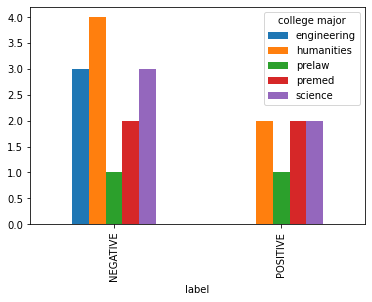

In [ ]:
final_df.groupby(['college major'])['label'].value_counts().unstack().transpose().plot(kind='bar');

## What if we wanted to compute an aggregate score?
Looking at negative and positive is a bit hard.  Maybe we could just calculate a score reflecting whether overall, the group tends to have positive reviews.  We can calculate this as `no_positive_reviews - no_negative_reviews`.

In [ ]:
negpos_df = final_df.groupby(['college major'])['label'].value_counts().unstack().fillna(0)
negpos_df

label,NEGATIVE,POSITIVE
college major,,
engineering,3.0,0.0
humanities,4.0,2.0
prelaw,1.0,1.0
premed,2.0,2.0
science,3.0,2.0


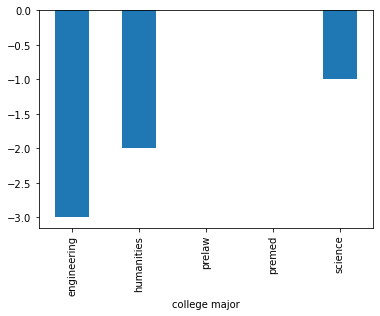

In [ ]:
negpos_df['overall_positivity'] = negpos_df['POSITIVE'] - negpos_df['NEGATIVE']
negpos_df['overall_positivity'].transpose().plot(kind='bar');

# What we've covered
We've covered a lot of ground today!  We've discussed several things:
* Reading in text files via Google Colab and locally via the glob package
* Example of HuggingFace sentiment-analysis model inference using demo function
* Converting outputs to dataframes

# Homework assignment
Upload your data to Google Drive if you can, and make sure that you can access it programmatically!  We'll be working on your own data for the next few classes.  If something prevents you from uploading data to cloud storage, make sure you follow the instructions in the `0-Installations` notebook to install Anaconda locally.  Make sure you install HuggingFace transformers and all required Pytorch (or TensorFlow) packages. 